<a href="https://colab.research.google.com/github/Tej752/AppliedML_Python_Coursera/blob/master/Copy_of_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
players=pd.read_csv('Data.csv')
players['region']=players['region'].fillna(0)
players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 52.3+ KB


Converting Fpl_sel(object) values to Float values

In [ ]:
srr=players.fpl_sel.values
arr=[]
for x in range(len(srr)):
    j=float(srr[x].replace('%' , ''))
    arr.append(j)
srr=arr
players['fpl_sel']=srr
players.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 54.1+ KB


In [ ]:
players.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,3.244252,57.314534,1.989154,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,5.675657,53.113811,0.961143,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.200000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,1.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,3.300000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,45.000000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
players.market_value.median()

7.0

<AxesSubplot:xlabel='market_value'>

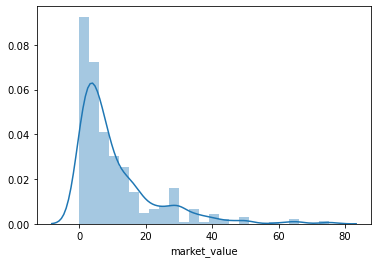

In [ ]:
sns.distplot(players['market_value'])

Above shows the data is right hand skewed 

In [ ]:
players.corr()['market_value'].sort_values()

position_cat   -0.217637
age            -0.132396
age_cat        -0.117682
club_id        -0.046068
new_foreign     0.098056
region          0.103188
new_signing     0.131321
fpl_sel         0.548703
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

In [ ]:
players1=players.copy()
players1=players1.set_index(['name','club'])
players1.head()
print('Player with most market_value ->',players1['market_value'].nlargest(),players1['market_value'].max(),
      '\nPlayer with least market value ->',players1['market_value'].nsmallest(),players1['market_value'].min())

Player with most market_value -> name             club             
Eden Hazard      Chelsea              75.0
Paul Pogba       Manchester+United    75.0
Alexis Sanchez   Arsenal              65.0
Kevin De Bruyne  Manchester+City      65.0
Sergio Aguero    Manchester+City      65.0
Name: market_value, dtype: float64 75.0 
Player with least market value -> name                 club             
Eduardo Carvalho     Chelsea              0.05
Joel Castro Pereira  Manchester+United    0.10
Niki Maenpaa         Brighton+and+Hove    0.25
Matthew Taylor       Burnley              0.25
Julian Speroni       Crystal+Palace       0.25
Name: market_value, dtype: float64 0.05


In [ ]:
from scipy.stats import chi2_contingency
data = pd.crosstab(players.club, players.position)
stat, p, dof, expected = chi2_contingency(data) 
print(data)
print(stat,p)

position           AM  CB  CF  CM  DM  GK  LB  LM  LW  RB  RM  RW  SS
club                                                                 
Arsenal             1   5   4   3   3   3   3   0   2   2   1   1   0
Bournemouth         0   3   4   4   0   3   2   0   4   2   0   1   1
Brighton+and+Hove   0   4   3   5   0   2   2   0   2   2   1   1   0
Burnley             0   3   3   3   2   1   1   3   0   1   0   1   0
Chelsea             0   4   2   1   3   2   2   0   2   1   1   2   0
Crystal+Palace      1   3   2   3   1   2   3   0   1   2   0   3   0
Everton             2   6   1   3   3   3   1   0   2   3   0   2   2
Huddersfield        1   7   4   5   0   2   2   0   2   1   0   4   0
Leicester+City      0   5   5   2   4   2   2   1   1   1   0   1   0
Liverpool           2   5   4   4   2   2   1   0   3   2   0   1   1
Manchester+City     2   3   3   3   2   2   1   0   2   1   0   1   0
Manchester+United   2   6   3   3   2   3   2   1   1   2   0   0   0
Newcastle+United    

Text(0.5, 1.0, 'Relation Payers age and their market value')

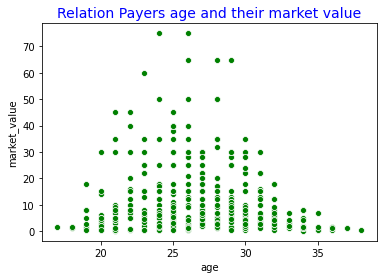

In [ ]:
sns.scatterplot(players['age'],players['market_value'],color='green')
plt.title('Relation Payers age and their market value',color='blue',fontsize=14)

<AxesSubplot:xlabel='market_value', ylabel='position_cat'>

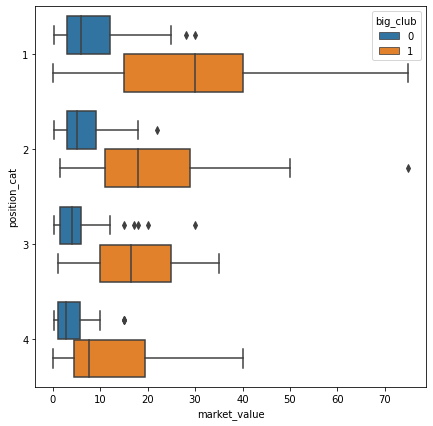

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(y='position_cat',x='market_value',data=players,hue='big_club',orient='h')

It Shows big club players have larger market value

Total no of players from each club

Text(0.5, 1.0, 'Total players from each club')

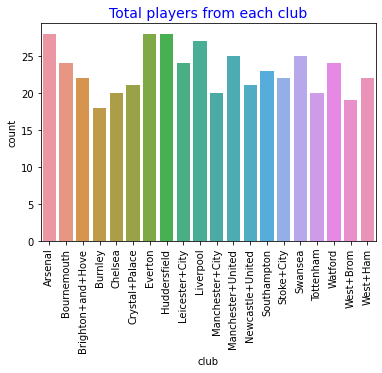

In [ ]:
sns.countplot(players.sort_values('club_id').club)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Total players from each club',color='blue',fontsize=14)

Comparing different attributes with market values

Text(0.5, 1.0, 'Relation of Big_Club vs Market_Value')

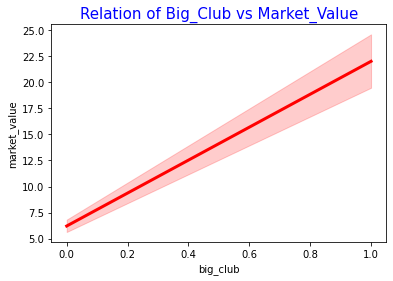

In [ ]:
sns.lineplot(players['big_club'],players['market_value'],color='red',linewidth=3)
plt.title('Relation of Big_Club vs Market_Value',fontsize=15,color='blue')

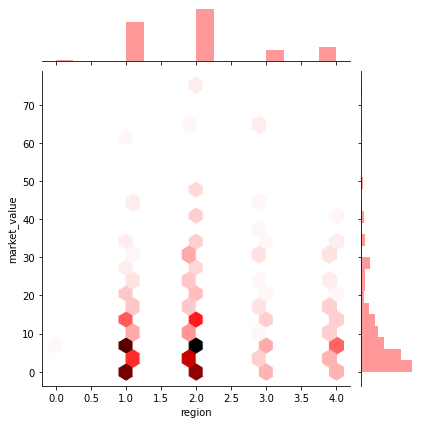

In [ ]:
sns.jointplot(players['region'],players['market_value'],color='red',kind='hex')

Text(0.5, 1.0, 'Relation of Postion of Player vs Market_Value')

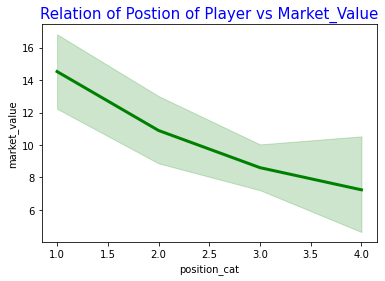

In [ ]:
sns.lineplot(players['position_cat'],players['market_value'],color='green',linewidth=3)
plt.title('Relation of Postion of Player vs Market_Value',fontsize=15,color='blue')

Text(0.5, 1.0, 'Relation of Players Value in Fantasy Premier League with market value')

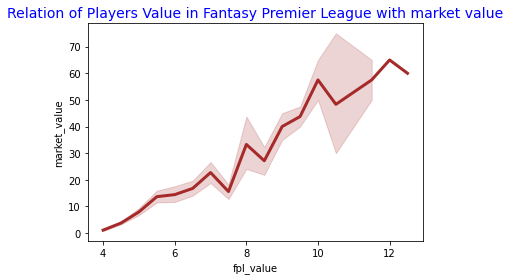

In [ ]:
sns.lineplot(players['fpl_value'],players['market_value'],color='brown',linewidth=3)
plt.title('Relation of Players Value in Fantasy Premier League with market value',fontsize=14,color='blue')

<Figure size 720x720 with 0 Axes>

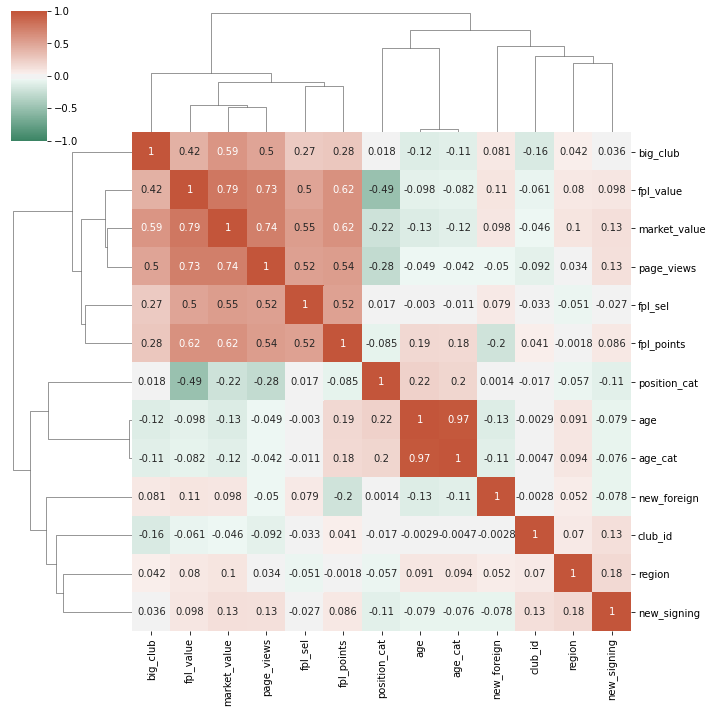

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.clustermap(players.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(150,20,n=200),annot=True)

Text(0.5, 1.0, 'Relation of Players Value in Fantasy Premier League with regards to postions they play')

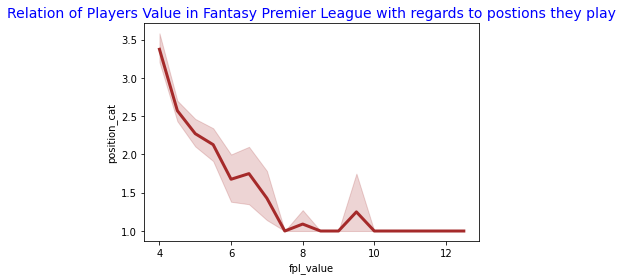

In [ ]:
sns.lineplot(players['fpl_value'],players['position_cat'],color='brown',linewidth=3)
plt.title('Relation of Players Value in Fantasy Premier League with regards to postions they play',fontsize=14,color='blue')

c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


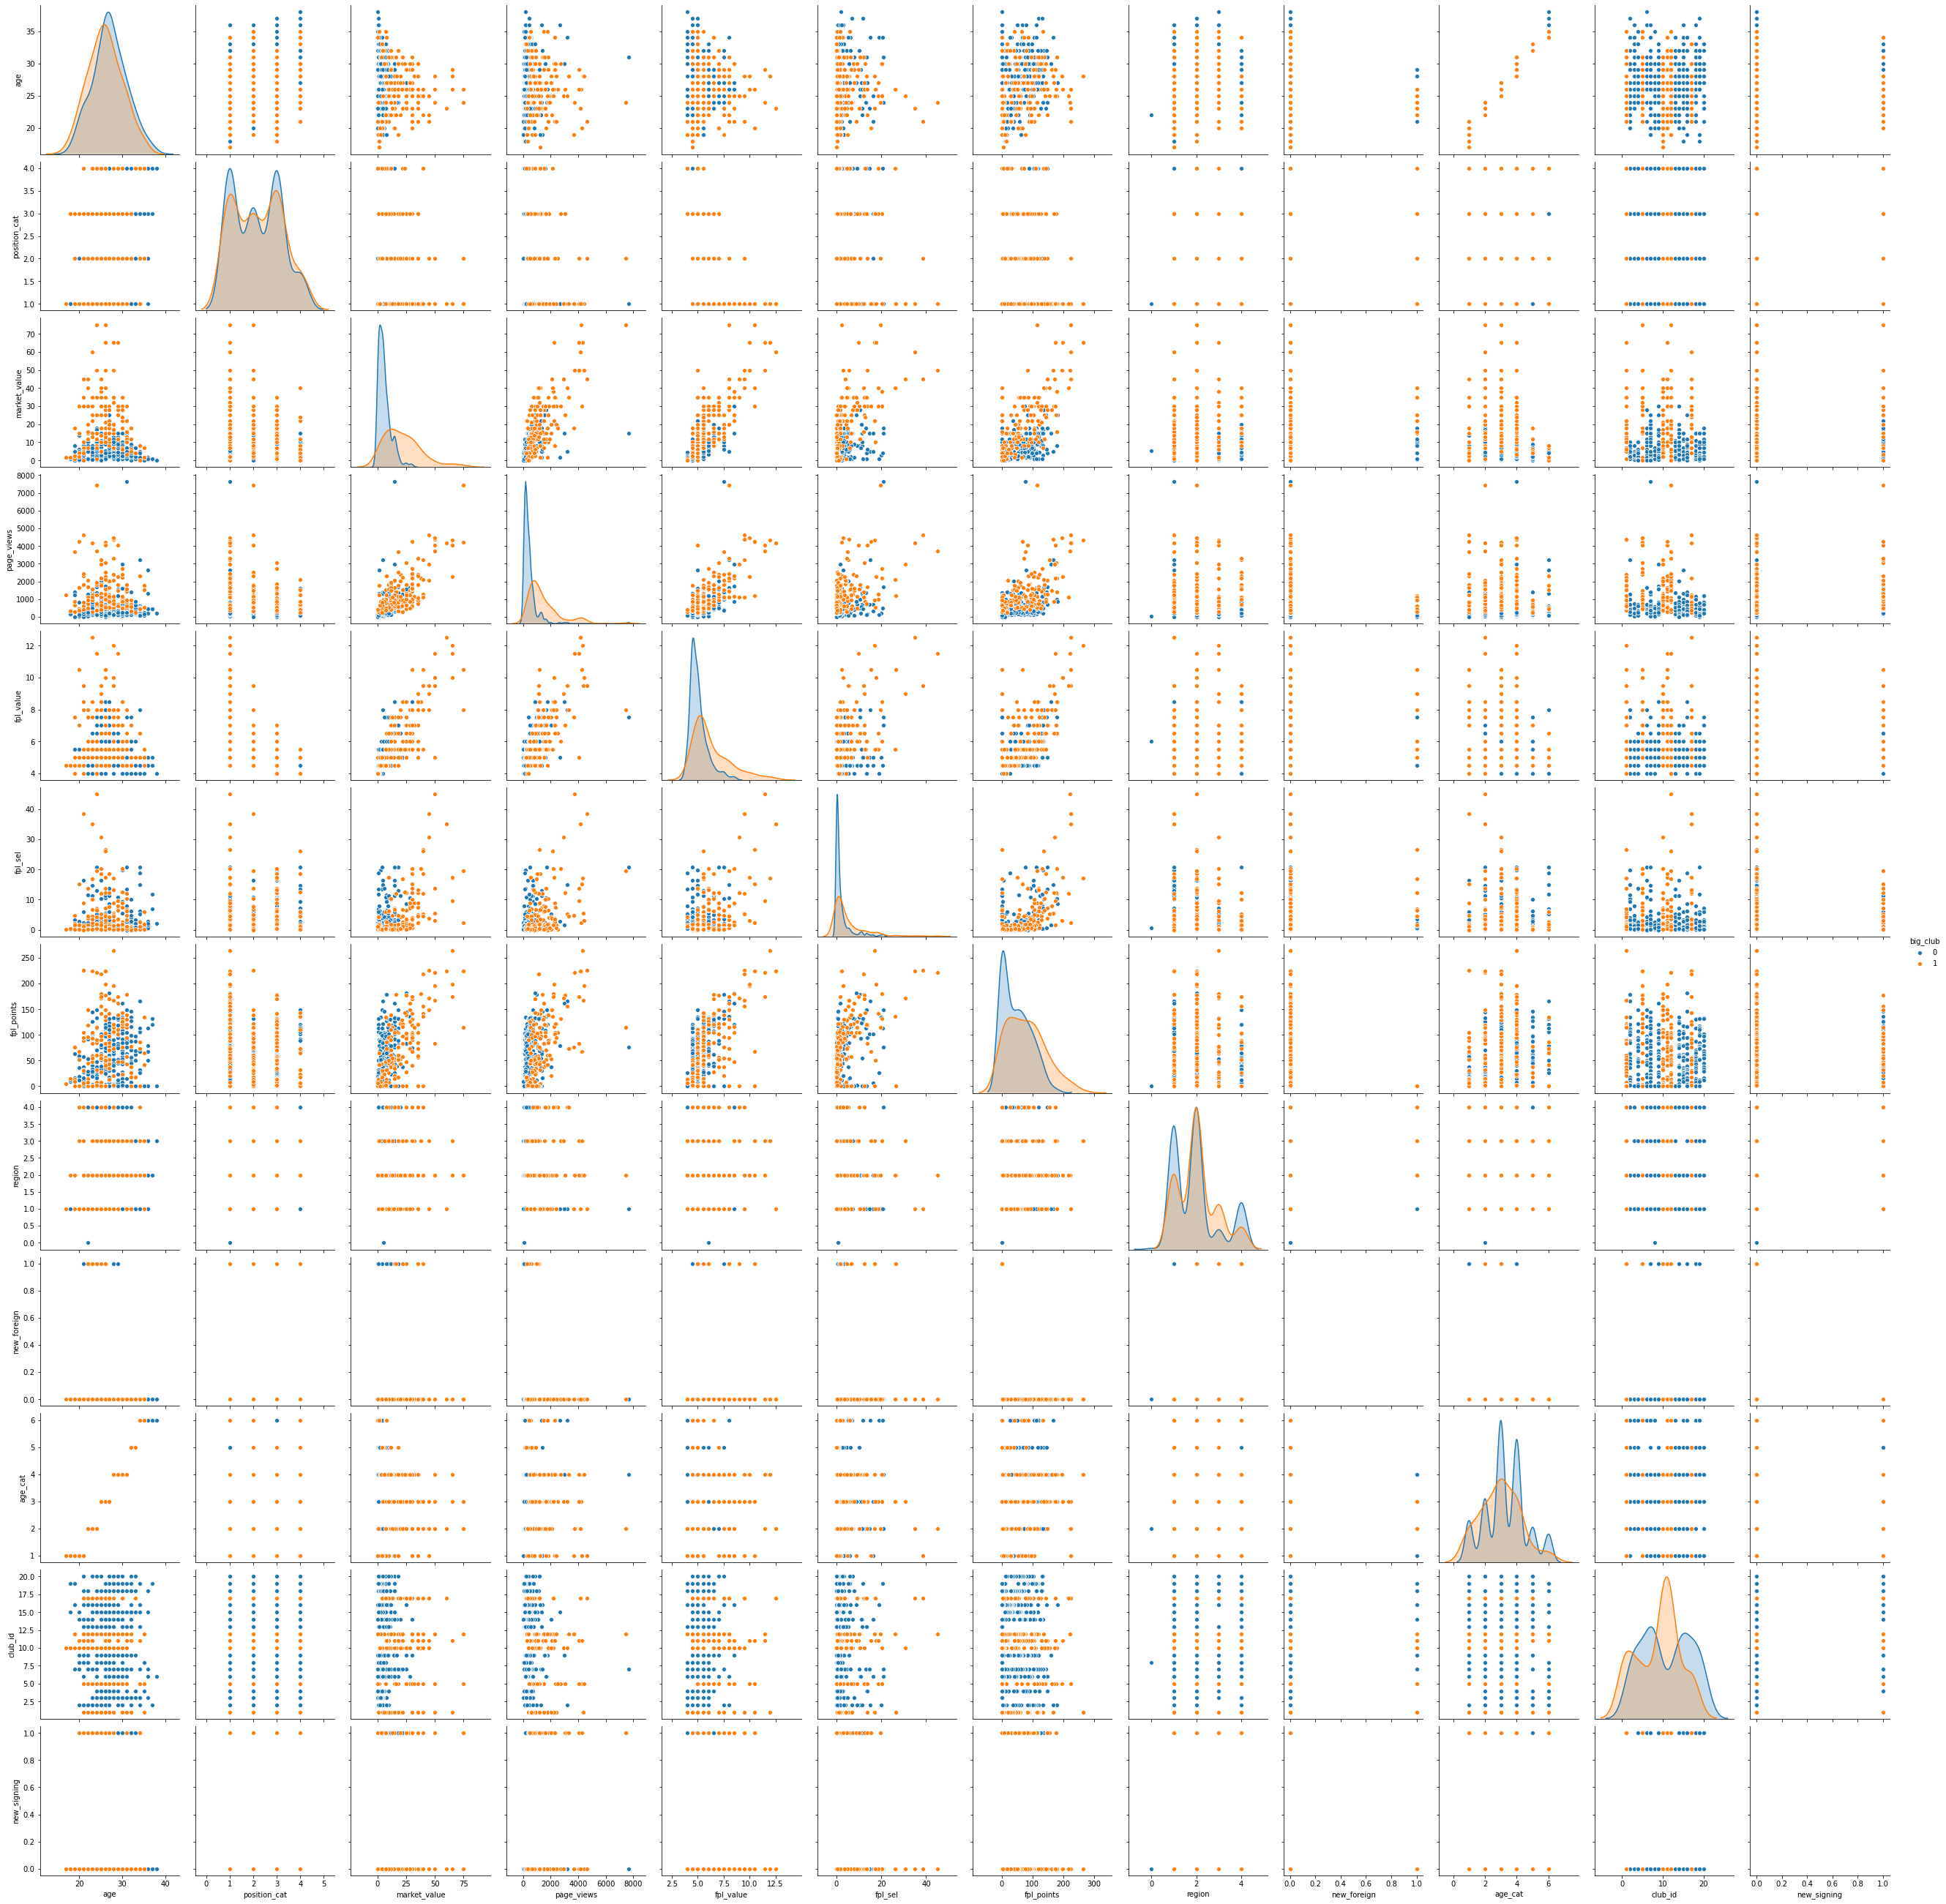

In [ ]:
sns.pairplot(players,hue='big_club',height=3)

Checking for null hypothesis (i.e to reject if p<0.05)

In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=players, res_var='market_value', xfac_var='club')
res.levene_summary

,Parameter,Value
0,Test statistics (W),8.7866
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
scaler=MinMaxScaler()
X=players[['age','position_cat','page_views','fpl_value','fpl_sel','fpl_points','big_club','region']]
y=players[['market_value']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.shape,y_train.shape)

(299, 8) (299, 1)


In [ ]:
import statsmodels.api as sm  
X_train_stats = sm.add_constant(X_train_scaled)
lm = sm.OLS(y_train,X_train_stats).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     133.2
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           2.07e-92
Time:                        15:53:42   Log-Likelihood:                -935.63
No. Observations:                 299   AIC:                             1889.
Df Residuals:                     290   BIC:                             1923.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1239      1.134      0.991      0.3

In [ ]:
lrmodel=LinearRegression().fit(X_train_scaled,y_train)
print('Linear regression linear model intercept: {}'
     .format(lrmodel.intercept_))
print('Linear regression linear model coeff:\n{}'
     .format(lrmodel.coef_))
print('R-squared score (training): {:.3f}'
     .format(lrmodel.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lrmodel.score(X_test_scaled, y_test)))
print('Mean-Squared-Error (train): {:.3f}'
      .format(mean_squared_error(y_train,lrmodel.predict(X_train_scaled))))
print('Mean-Squared-Error (test): {:.3f}'
      .format(mean_squared_error(y_test,lrmodel.predict(X_test_scaled))))

Linear regression linear model intercept: [1.12394018]
Linear regression linear model coeff:
[[-7.45636848  1.91465225  5.25039448 33.18918763 10.93891145 10.04036278
   7.20266292  3.5240746 ]]
R-squared score (training): 0.786
R-squared score (test): 0.708
Mean-Squared-Error (train): 30.586
Mean-Squared-Error (test): 47.478


Text(0.5, 1.0, 'Error Terms')

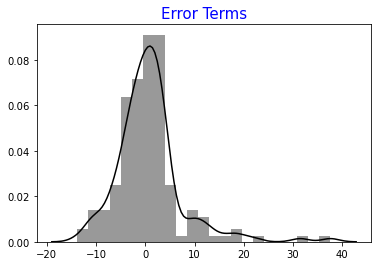

In [ ]:
sns.distplot(y_test - lrmodel.predict(X_test_scaled),color='black')
plt.title('Error Terms',fontsize=15,color='blue')

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print('Ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('Ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ridge regression linear model intercept: [-11.49340173]
Ridge regression linear model coeff:
[[-3.61938614e-01  8.41129456e-01  1.78960939e-03  4.02176033e+00
   1.82434434e-01  4.49320906e-02  4.47090621e+00  1.17791259e+00]]
R-squared score (training): 0.774
R-squared score (test): 0.723
Number of non-zero features: 8


Ridge Regression with regulaization parameter alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 3, r-squared training: 0.78, r-squared test: 0.72

Alpha = 1.00
num abs(coeff) > 1.0: 3, r-squared training: 0.78, r-squared test: 0.72

Alpha = 10.00
num abs(coeff) > 1.0: 3, r-squared training: 0.78, r-squared test: 0.72

Alpha = 20.00
num abs(coeff) > 1.0: 3, r-squared training: 0.77, r-squared test: 0.72

Alpha = 50.00
num abs(coeff) > 1.0: 3, r-squared training: 0.77, r-squared test: 0.72

Alpha = 100.00
num abs(coeff) > 1.0: 3, r-squared training: 0.75, r-squared test: 0.72

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.67, r-squared test: 0.70

